In [1]:
#### All dependencies

## Data collection and visualisation

import yfinance as yf
import pandas as pd
from pandas import  read_csv
from pandas import set_option
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.dates as mpl_dates


import plotly.offline as py
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

plt.style.use('seaborn-darkgrid')


## Prediction Engine, Featuring Engineering, Model Evaluation
import warnings
warnings.filterwarnings('ignore')
import os
# import pandas as pd
import numpy as np
import math
import datetime as dt
# import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

from itertools import product
import statsmodels.api as sm

import tensorflow as tf

from keras.models import Sequential
from keras.models import load_model
from keras.layers import Activation, Dense, Dropout
from keras.layers import LSTM

from itertools import cycle
# import plotly.offline as py
# import plotly.graph_objects as go
# import plotly.express as px
# from plotly.subplots import make_subplots

# plt.style.use('seaborn-darkgrid')



TypeError: Descriptors cannot be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

In [4]:
##Data Collection and Storage

# ###Import relevant libraries

# import yfinance as yf
# import pandas as pd
# from pandas import  read_csv
# from pandas import set_option
# from matplotlib import pyplot as plt
# %matplotlib inline
# import matplotlib.dates as mpl_dates



###Import live data from YahooFinance! API and Store in a dataframe
#Create an empty pandas dataframe
df = pd.DataFrame()

#Create a list with all crypto symbols. Use top 10 coins by market capitalisation according to CoinGecko.com
crypto_ticker = ['BTC', 'ETH', 'USDT', 'USDC', 'BNB', 'BUSD', 'XRP', 'ADA', 'SOL', 'DOGE', 'DAI', 'DOT', 'MATIC', 'AVAX', 
                 'SHIB','TRX', 'UNI', 'WBTC', 'LEO', 'LTC', 'FTT', 'ETC', 'LINK', 'CRO', 'NEAR', 'XLM', 'XMR', 'ATOM', 'BCH',
                 'ALGO', 'APE', 'FLOW', 'VET', 'MANA', 'SAND', 'ICP', 'XTZ', 'HBAR', 'FIL', 'AXS', 'THETA', 'EGLD', 'TUSD',
                 'AAVE', 'EOS', 'QNT', 'HNT', 'BSV', 'KCS', 'USDP']


#Extract data for each of the coins from YahooFinance! using a For loop.
for each_crypto_ticker in crypto_ticker:
    each_crypto_ticker_index = crypto_ticker.index(each_crypto_ticker)
    crypto_data = yf.Ticker(f"{each_crypto_ticker}-USD").history(start='2019-01-01', end='2022-06-30', interval='1d')
    crypto_dataframe = pd.DataFrame(crypto_data)
    crypto_dataframe['crypto_ticker'] = each_crypto_ticker
    df = pd.concat([df, crypto_dataframe])

set_option('display.width', 500)
df = df.rename_axis('cryptodate').reset_index()
df.to_csv("soligencecryptodata_withdate.csv")

###Extract data to different dataframes to simplify data understanding for each cryptocurrency

# Top 10
BTC_crypto_data = df.loc[df['crypto_ticker'] == 'BTC']
ETH_crypto_data = df.loc[df['crypto_ticker'] == 'ETH']
USDT_crypto_data = df.loc[df['crypto_ticker'] == 'USDT']
USDC_crypto_data = df.loc[df['crypto_ticker'] == 'USDC']
BNB_crypto_data = df.loc[df['crypto_ticker'] == 'BNB']
BUSD_crypto_data = df.loc[df['crypto_ticker'] == 'BUSD']
XRP_crypto_data = df.loc[df['crypto_ticker'] == 'XRP']
ADA_crypto_data = df.loc[df['crypto_ticker'] == 'ADA']
SOL_crypto_data = df.loc[df['crypto_ticker'] == 'SOL']
DOGE_crypto_data = df.loc[df['crypto_ticker'] == 'DOGE']

#next 10 - 20
DAI_crypto_data = df.loc[df['crypto_ticker'] == 'DAI']
DOT_crypto_data = df.loc[df['crypto_ticker'] == 'DOT']
MATIC_crypto_data = df.loc[df['crypto_ticker'] == 'MATIC']
AVAX_crypto_data = df.loc[df['crypto_ticker'] == 'AVAX']
SHIB_crypto_data = df.loc[df['crypto_ticker'] == 'SHIB']
TRX_crypto_data = df.loc[df['crypto_ticker'] == 'UNI']
UNI_crypto_data = df.loc[df['crypto_ticker'] == 'XRP']
WBTC_crypto_data = df.loc[df['crypto_ticker'] == 'WBTC']
LEO_crypto_data = df.loc[df['crypto_ticker'] == 'LEO']
LTC_crypto_data = df.loc[df['crypto_ticker'] == 'LTC']


# 20 - 30
FTT_crypto_data = df.loc[df['crypto_ticker'] == 'FTT']
ETC_crypto_data = df.loc[df['crypto_ticker'] == 'ETC']
LINK_crypto_data = df.loc[df['crypto_ticker'] == 'LINK']
CRO_crypto_data = df.loc[df['crypto_ticker'] == 'CRO']
NEAR_crypto_data = df.loc[df['crypto_ticker'] == 'NEAR']
XLM_crypto_data = df.loc[df['crypto_ticker'] == 'XLM']
XMR_crypto_data = df.loc[df['crypto_ticker'] == 'XMR']
ATOM_crypto_data = df.loc[df['crypto_ticker'] == 'ATOM']
BCH_crypto_data = df.loc[df['crypto_ticker'] == 'BCH']
ALGO_crypto_data = df.loc[df['crypto_ticker'] == 'ALGO']

# 30 - 40

APE_crypto_data = df.loc[df['crypto_ticker'] == 'APE']
FLOW_crypto_data = df.loc[df['crypto_ticker'] == 'FLOW']
VET_crypto_data = df.loc[df['crypto_ticker'] == 'VET']
MANA_crypto_data = df.loc[df['crypto_ticker'] == 'MANA']
SAND_crypto_data = df.loc[df['crypto_ticker'] == 'SAND']
ICP_crypto_data = df.loc[df['crypto_ticker'] == 'ICP']
XTZ_crypto_data = df.loc[df['crypto_ticker'] == 'XTZ']
HBAR_crypto_data = df.loc[df['crypto_ticker'] == 'HBAR']
FIL_crypto_data = df.loc[df['crypto_ticker'] == 'FIL']
AXS_crypto_data = df.loc[df['crypto_ticker'] == 'AXS']

# 40 - 50

THETA_crypto_data = df.loc[df['crypto_ticker'] == 'THETA']
EGLD_crypto_data = df.loc[df['crypto_ticker'] == 'EGLD']
TUSD_crypto_data = df.loc[df['crypto_ticker'] == 'TUSD']
AAVE_crypto_data = df.loc[df['crypto_ticker'] == 'AAVE']
EOS_crypto_data = df.loc[df['crypto_ticker'] == 'EOS']
QNT_crypto_data = df.loc[df['crypto_ticker'] == 'QNT']
HNT_crypto_data = df.loc[df['crypto_ticker'] == 'HNT']
BSV_crypto_data = df.loc[df['crypto_ticker'] == 'BSV']
KCS_crypto_data = df.loc[df['crypto_ticker'] == 'KCS']
USDP_crypto_data = df.loc[df['crypto_ticker'] == 'USDP']

df

,cryptodate,Open,High,Low,Close,Volume,Dividends,Stock Splits,crypto_ticker
0,2019-01-01,3746.713379,3850.913818,3707.231201,3843.520020,4324200990,0,0,BTC
1,2019-01-02,3849.216309,3947.981201,3817.409424,3943.409424,5244856836,0,0,BTC
2,2019-01-03,3931.048584,3935.685059,3826.222900,3836.741211,4530215219,0,0,BTC
3,2019-01-04,3832.040039,3865.934570,3783.853760,3857.717529,4847965467,0,0,BTC
4,2019-01-05,3851.973877,3904.903076,3836.900146,3845.194580,5137609824,0,0,BTC
...,...,...,...,...,...,...,...,...,...
53428,2022-06-25,0.999011,1.004380,0.996896,1.002611,23097778,0,0,USDP
53429,2022-06-26,1.002372,1.003421,0.995827,0.997344,148227078,0,0,USDP
53430,2022-06-27,0.997289,1.001221,0.993621,0.997306,227819519,0,0,USDP
53431,2022-06-28,0.997144,1.000768,0.994523,0.997512,64524589,0,0,USDP


,cryptodate,Open,High,Low,Close,Volume,Dividends,Stock Splits,crypto_ticker
0,2019-01-01,3746.713379,3850.913818,3707.231201,3843.520020,4324200990,0,0,BTC
1,2019-01-02,3849.216309,3947.981201,3817.409424,3943.409424,5244856836,0,0,BTC
2,2019-01-03,3931.048584,3935.685059,3826.222900,3836.741211,4530215219,0,0,BTC
3,2019-01-04,3832.040039,3865.934570,3783.853760,3857.717529,4847965467,0,0,BTC
4,2019-01-05,3851.973877,3904.903076,3836.900146,3845.194580,5137609824,0,0,BTC
...,...,...,...,...,...,...,...,...,...
53428,2022-06-25,0.999011,1.004380,0.996896,1.002611,23097778,0,0,USDP
53429,2022-06-26,1.002372,1.003421,0.995827,0.997344,148227078,0,0,USDP
53430,2022-06-27,0.997289,1.001221,0.993621,0.997306,227819519,0,0,USDP
53431,2022-06-28,0.997144,1.000768,0.994523,0.997512,64524589,0,0,USDP


In [6]:
#Question 2

#1. Get Data from Yfinance
#2. Convert index with date to an attribute/feature column using. df.rename_axis('cryptodate').reset_index()
#3. Split all 10 cryptocurrencies to seperate dataframes so they carry the new date (you can store in csv if you want)
#4. Create a new dataframe where all columns but the 'Close' column are dropped
#5. Use the .map() function and .set_index() methods to add new columns using a combination of the new master dataframe with all dates


allcrypto_cp = df.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits', 'crypto_ticker', 'Close'])

allcrypto_cp = allcrypto_cp.drop_duplicates(subset=['cryptodate'])

allcrypto_cp['btc_cp'] = allcrypto_cp.cryptodate.map(BTC_crypto_data.set_index('cryptodate')['Close'].to_dict())
allcrypto_cp['eth_cp'] = allcrypto_cp.cryptodate.map(ETH_crypto_data.set_index('cryptodate')['Close'].to_dict())
allcrypto_cp['usdt_cp'] = allcrypto_cp.cryptodate.map(USDT_crypto_data.set_index('cryptodate')['Close'].to_dict())
allcrypto_cp['usdc_cp'] = allcrypto_cp.cryptodate.map(USDC_crypto_data.set_index('cryptodate')['Close'].to_dict())
allcrypto_cp['bnb_cp'] = allcrypto_cp.cryptodate.map(BNB_crypto_data.set_index('cryptodate')['Close'].to_dict())
allcrypto_cp['busd_cp'] = allcrypto_cp.cryptodate.map(BUSD_crypto_data.set_index('cryptodate')['Close'].to_dict())
allcrypto_cp['xrp_cp'] = allcrypto_cp.cryptodate.map(XRP_crypto_data.set_index('cryptodate')['Close'].to_dict())
allcrypto_cp['ada_cp'] = allcrypto_cp.cryptodate.map(ADA_crypto_data.set_index('cryptodate')['Close'].to_dict())
allcrypto_cp['sol_cp'] = allcrypto_cp.cryptodate.map(SOL_crypto_data.set_index('cryptodate')['Close'].to_dict())
allcrypto_cp['doge_cp'] = allcrypto_cp.cryptodate.map(DOGE_crypto_data.set_index('cryptodate')['Close'].to_dict())

# 10 - 20
allcrypto_cp['dai_cp'] = allcrypto_cp.cryptodate.map(DAI_crypto_data.set_index('cryptodate')['Close'].to_dict())
allcrypto_cp['dot_cp'] = allcrypto_cp.cryptodate.map(DOT_crypto_data.set_index('cryptodate')['Close'].to_dict())
allcrypto_cp['matic_cp'] = allcrypto_cp.cryptodate.map(MATIC_crypto_data.set_index('cryptodate')['Close'].to_dict())
allcrypto_cp['avax_cp'] = allcrypto_cp.cryptodate.map(AVAX_crypto_data.set_index('cryptodate')['Close'].to_dict())
allcrypto_cp['shib_cp'] = allcrypto_cp.cryptodate.map(SHIB_crypto_data.set_index('cryptodate')['Close'].to_dict())
allcrypto_cp['trx_cp'] = allcrypto_cp.cryptodate.map(TRX_crypto_data.set_index('cryptodate')['Close'].to_dict())
allcrypto_cp['uni_cp'] = allcrypto_cp.cryptodate.map(UNI_crypto_data.set_index('cryptodate')['Close'].to_dict())
allcrypto_cp['wbtc_cp'] = allcrypto_cp.cryptodate.map(WBTC_crypto_data.set_index('cryptodate')['Close'].to_dict())
allcrypto_cp['leo_cp'] = allcrypto_cp.cryptodate.map(LEO_crypto_data.set_index('cryptodate')['Close'].to_dict())
allcrypto_cp['ltc_cp'] = allcrypto_cp.cryptodate.map(LTC_crypto_data.set_index('cryptodate')['Close'].to_dict())


# 20 TO 30
allcrypto_cp['ftt_cp'] = allcrypto_cp.cryptodate.map(FTT_crypto_data.set_index('cryptodate')['Close'].to_dict())
allcrypto_cp['etc_cp'] = allcrypto_cp.cryptodate.map(ETC_crypto_data.set_index('cryptodate')['Close'].to_dict())
allcrypto_cp['link_cp'] = allcrypto_cp.cryptodate.map(LINK_crypto_data.set_index('cryptodate')['Close'].to_dict())
allcrypto_cp['cro_cp'] = allcrypto_cp.cryptodate.map(CRO_crypto_data.set_index('cryptodate')['Close'].to_dict())
allcrypto_cp['near_cp'] = allcrypto_cp.cryptodate.map(NEAR_crypto_data.set_index('cryptodate')['Close'].to_dict())
allcrypto_cp['xlm_cp'] = allcrypto_cp.cryptodate.map(XLM_crypto_data.set_index('cryptodate')['Close'].to_dict())
allcrypto_cp['xmr_cp'] = allcrypto_cp.cryptodate.map(XMR_crypto_data.set_index('cryptodate')['Close'].to_dict())
allcrypto_cp['atom_cp'] = allcrypto_cp.cryptodate.map(ATOM_crypto_data.set_index('cryptodate')['Close'].to_dict())
allcrypto_cp['bch_cp'] = allcrypto_cp.cryptodate.map(BCH_crypto_data.set_index('cryptodate')['Close'].to_dict())
allcrypto_cp['algo_cp'] = allcrypto_cp.cryptodate.map(ALGO_crypto_data.set_index('cryptodate')['Close'].to_dict())



#30 TO 40

allcrypto_cp['ape_cp'] = allcrypto_cp.cryptodate.map(APE_crypto_data.set_index('cryptodate')['Close'].to_dict())
allcrypto_cp['flow_cp'] = allcrypto_cp.cryptodate.map(FLOW_crypto_data.set_index('cryptodate')['Close'].to_dict())
allcrypto_cp['vet_cp'] = allcrypto_cp.cryptodate.map(VET_crypto_data.set_index('cryptodate')['Close'].to_dict())
allcrypto_cp['mana_cp'] = allcrypto_cp.cryptodate.map(MANA_crypto_data.set_index('cryptodate')['Close'].to_dict())
allcrypto_cp['sand_cp'] = allcrypto_cp.cryptodate.map(SAND_crypto_data.set_index('cryptodate')['Close'].to_dict())
allcrypto_cp['icp_cp'] = allcrypto_cp.cryptodate.map(ICP_crypto_data.set_index('cryptodate')['Close'].to_dict())
allcrypto_cp['xtz_cp'] = allcrypto_cp.cryptodate.map(XTZ_crypto_data.set_index('cryptodate')['Close'].to_dict())
allcrypto_cp['hbar_cp'] = allcrypto_cp.cryptodate.map(HBAR_crypto_data.set_index('cryptodate')['Close'].to_dict())
allcrypto_cp['fil_cp'] = allcrypto_cp.cryptodate.map(FIL_crypto_data.set_index('cryptodate')['Close'].to_dict())
allcrypto_cp['axs_cp'] = allcrypto_cp.cryptodate.map(AXS_crypto_data.set_index('cryptodate')['Close'].to_dict())

#40 TO 50
allcrypto_cp['theta_cp'] = allcrypto_cp.cryptodate.map(THETA_crypto_data.set_index('cryptodate')['Close'].to_dict())
allcrypto_cp['egld_cp'] = allcrypto_cp.cryptodate.map(EGLD_crypto_data.set_index('cryptodate')['Close'].to_dict())
allcrypto_cp['tusd_cp'] = allcrypto_cp.cryptodate.map(TUSD_crypto_data.set_index('cryptodate')['Close'].to_dict())
allcrypto_cp['aave_cp'] = allcrypto_cp.cryptodate.map(AAVE_crypto_data.set_index('cryptodate')['Close'].to_dict())
allcrypto_cp['eos_cp'] = allcrypto_cp.cryptodate.map(EOS_crypto_data.set_index('cryptodate')['Close'].to_dict())
allcrypto_cp['qnt_cp'] = allcrypto_cp.cryptodate.map(QNT_crypto_data.set_index('cryptodate')['Close'].to_dict())
allcrypto_cp['hnt_cp'] = allcrypto_cp.cryptodate.map(HNT_crypto_data.set_index('cryptodate')['Close'].to_dict())
allcrypto_cp['bsv_cp'] = allcrypto_cp.cryptodate.map(BSV_crypto_data.set_index('cryptodate')['Close'].to_dict())
allcrypto_cp['kcs_cp'] = allcrypto_cp.cryptodate.map(KCS_crypto_data.set_index('cryptodate')['Close'].to_dict())
allcrypto_cp['usdp_cp'] = allcrypto_cp.cryptodate.map(USDP_crypto_data.set_index('cryptodate')['Close'].to_dict())


allcrypto_cp = allcrypto_cp.drop(columns=['cryptodate'])

allcrypto_cp


,btc_cp,eth_cp,usdt_cp,usdc_cp,bnb_cp,busd_cp,xrp_cp,ada_cp,sol_cp,doge_cp,...,theta_cp,egld_cp,tusd_cp,aave_cp,eos_cp,qnt_cp,hnt_cp,bsv_cp,kcs_cp,usdp_cp
0,3843.520020,140.819412,1.018335,1.013301,6.075273,NaN,0.364771,0.042547,NaN,0.002392,...,0.049690,NaN,1.011677,NaN,2.663533,2.057140,NaN,92.142319,0.640510,1.009348
1,3943.409424,155.047684,1.024012,1.018173,6.188613,NaN,0.375243,0.045258,NaN,0.002407,...,0.050489,NaN,1.018685,NaN,2.887629,2.124236,NaN,94.883766,0.653204,1.016041
2,3836.741211,149.135010,1.019473,1.013577,5.903535,NaN,0.360224,0.042682,NaN,0.002360,...,0.052906,NaN,1.013455,NaN,2.681411,2.218559,NaN,88.643326,0.614000,1.012126
3,3857.717529,154.581940,1.017200,1.008160,6.065138,NaN,0.356747,0.043812,NaN,0.002315,...,0.051363,NaN,1.008845,NaN,2.721645,2.572437,NaN,87.645248,0.605391,1.007285
4,3845.194580,155.638596,1.018489,1.011010,6.065543,NaN,0.355275,0.044701,NaN,0.002319,...,0.050197,NaN,1.011664,NaN,2.699468,2.321000,NaN,88.520134,0.606198,1.009216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,21502.337891,1243.446899,0.999548,1.000104,239.690659,1.000150,0.367556,0.498946,42.332813,0.068503,...,1.473540,61.734116,1.000638,70.044456,1.008106,63.407124,11.657512,63.933376,10.913143,1.002611
1272,21027.294922,1199.831665,0.999398,0.999813,233.858749,1.000705,0.358864,0.489653,39.408089,0.073177,...,1.332323,55.149887,1.000368,65.441956,0.991643,61.747894,10.636136,61.273827,10.709497,0.997344
1273,20735.478516,1193.680664,0.999092,1.000166,233.654022,0.999397,0.353235,0.485790,38.451252,0.072239,...,1.328123,56.092094,1.000447,65.394493,0.985200,59.022320,10.908705,60.162804,10.585495,0.997306
1274,20280.634766,1144.579224,0.998832,1.000140,226.927338,0.999807,0.337329,0.469671,35.326439,0.065957,...,1.262476,51.974117,1.000865,60.027874,0.945576,57.555889,9.967576,57.233635,10.175558,0.997512


,btc_cp,eth_cp,usdt_cp,usdc_cp,bnb_cp,busd_cp,xrp_cp,ada_cp,sol_cp,doge_cp,...,theta_cp,egld_cp,tusd_cp,aave_cp,eos_cp,qnt_cp,hnt_cp,bsv_cp,kcs_cp,usdp_cp
0,3843.520020,140.819412,1.018335,1.013301,6.075273,NaN,0.364771,0.042547,NaN,0.002392,...,0.049690,NaN,1.011677,NaN,2.663533,2.057140,NaN,92.142319,0.640510,1.009348
1,3943.409424,155.047684,1.024012,1.018173,6.188613,NaN,0.375243,0.045258,NaN,0.002407,...,0.050489,NaN,1.018685,NaN,2.887629,2.124236,NaN,94.883766,0.653204,1.016041
2,3836.741211,149.135010,1.019473,1.013577,5.903535,NaN,0.360224,0.042682,NaN,0.002360,...,0.052906,NaN,1.013455,NaN,2.681411,2.218559,NaN,88.643326,0.614000,1.012126
3,3857.717529,154.581940,1.017200,1.008160,6.065138,NaN,0.356747,0.043812,NaN,0.002315,...,0.051363,NaN,1.008845,NaN,2.721645,2.572437,NaN,87.645248,0.605391,1.007285
4,3845.194580,155.638596,1.018489,1.011010,6.065543,NaN,0.355275,0.044701,NaN,0.002319,...,0.050197,NaN,1.011664,NaN,2.699468,2.321000,NaN,88.520134,0.606198,1.009216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,21502.337891,1243.446899,0.999548,1.000104,239.690659,1.000150,0.367556,0.498946,42.332813,0.068503,...,1.473540,61.734116,1.000638,70.044456,1.008106,63.407124,11.657512,63.933376,10.913143,1.002611
1272,21027.294922,1199.831665,0.999398,0.999813,233.858749,1.000705,0.358864,0.489653,39.408089,0.073177,...,1.332323,55.149887,1.000368,65.441956,0.991643,61.747894,10.636136,61.273827,10.709497,0.997344
1273,20735.478516,1193.680664,0.999092,1.000166,233.654022,0.999397,0.353235,0.485790,38.451252,0.072239,...,1.328123,56.092094,1.000447,65.394493,0.985200,59.022320,10.908705,60.162804,10.585495,0.997306
1274,20280.634766,1144.579224,0.998832,1.000140,226.927338,0.999807,0.337329,0.469671,35.326439,0.065957,...,1.262476,51.974117,1.000865,60.027874,0.945576,57.555889,9.967576,57.233635,10.175558,0.997512


In [ ]:
### Short tutorial here: https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas

coin_correlation = allcrypto_cp.corr()

coin_correlation = coin_correlation.sort_values(by=['btc_cp'], ascending=True) #.style.background_gradient(cmap='BrBG_r')
# 'coolwarm' RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps


coin_correlation


,btc_cp,eth_cp,usdt_cp,usdc_cp,bnb_cp,busd_cp,xrp_cp,ada_cp,sol_cp,doge_cp,...,theta_cp,egld_cp,tusd_cp,aave_cp,eos_cp,qnt_cp,hnt_cp,bsv_cp,kcs_cp,usdp_cp
tusd_cp,-0.367979,-0.323573,0.650012,0.722268,-0.301329,0.927135,-0.241197,-0.283396,-0.184641,-0.263453,...,-0.250414,-0.129211,1.000000,0.071607,-0.026045,-0.246963,-0.194407,-0.353577,-0.282324,0.871095
dai_cp,-0.359705,-0.355677,0.204550,0.160128,-0.351562,0.065789,-0.309315,-0.311671,-0.357040,-0.290834,...,-0.261849,-0.393250,0.171788,-0.242840,-0.128407,-0.274073,-0.440607,0.084202,-0.338928,0.085244
usdc_cp,-0.355302,-0.319433,0.552579,1.000000,-0.298447,0.571824,-0.237705,-0.283967,-0.175160,-0.250302,...,-0.257040,-0.132389,0.722268,0.086424,-0.000220,-0.246588,-0.153715,-0.079880,-0.281745,0.719167
usdt_cp,-0.336896,-0.300822,1.000000,0.552579,-0.290568,0.900906,-0.215892,-0.265657,-0.158049,-0.237963,...,-0.238325,-0.010145,0.650012,0.217584,-0.049898,-0.232317,-0.113553,-0.221647,-0.277942,0.671280
usdp_cp,-0.333216,-0.301325,0.671280,0.719167,-0.281157,0.884388,-0.231099,-0.273209,-0.139682,-0.251429,...,-0.236522,-0.065885,0.871095,-0.006702,-0.075125,-0.239871,-0.102877,-0.301162,-0.262020,1.000000
trx_cp,-0.321178,-0.315949,0.275195,0.310451,-0.276301,0.310341,-0.205341,-0.258357,-0.220787,-0.191853,...,-0.193447,-0.044712,0.298582,0.501489,0.055428,-0.252971,-0.076340,0.010441,-0.278506,0.327108
ape_cp,-0.249699,-0.408837,0.233397,0.215676,-0.377638,0.095468,-0.230382,-0.282894,-0.343788,-0.283014,...,-0.091227,-0.298364,0.137841,-0.100322,0.039959,-0.324310,-0.359678,0.270497,-0.434388,0.127479
busd_cp,-0.215910,-0.214015,0.900906,0.571824,-0.190640,1.000000,-0.172216,-0.187543,-0.139097,-0.163784,...,-0.149609,-0.077286,0.927135,0.052047,-0.057937,-0.163528,-0.119098,-0.101657,-0.176655,0.884388
bsv_cp,0.191560,0.027617,-0.221647,-0.079880,0.051346,-0.101657,0.210903,0.117958,-0.308441,0.184337,...,0.313290,0.060462,-0.353577,0.613816,0.505188,-0.079252,-0.246925,1.000000,-0.151742,-0.301162
icp_cp,0.255327,0.244498,0.259288,0.070238,0.290376,-0.049704,0.608249,0.471635,-0.117406,0.834701,...,0.692100,0.036874,-0.193088,0.735598,0.881234,-0.037593,-0.065054,0.847145,-0.362833,-0.094184


In [11]:
btc_corr = coin_correlation.drop(columns=['eth_cp', 'usdt_cp', 'usdc_cp', 'bnb_cp', 'busd_cp', 'xrp_cp', 'ada_cp', 'sol_cp', 'doge_cp', ])

btc_corr = btc_corr.filter(['btc_cp'])
btc_corr.to_csv("weakornegativecorrelation_with_bitcoin.csv")

btc_corr.head(10)


,btc_cp
tusd_cp,-0.367979
dai_cp,-0.359705
usdc_cp,-0.355302
usdt_cp,-0.336896
usdp_cp,-0.333216
trx_cp,-0.321178
ape_cp,-0.249699
busd_cp,-0.215910
bsv_cp,0.191560
icp_cp,0.255327


In [13]:
btc_corr.to_csv("strongorpositivecorrelation_with_bitcoin.csv")
btc_corr.tail(11)

,btc_cp
ada_cp,0.887378
xlm_cp,0.888103
bnb_cp,0.912417
link_cp,0.912630
hbar_cp,0.917052
xmr_cp,0.921293
ftt_cp,0.926695
eth_cp,0.927428
dot_cp,0.937575
wbtc_cp,0.999962


In [14]:
##### CELL FOR DROPPING COLUMNS NOT NEEDED #####


### TO AVOID THE SETWARNING? ERROR RELATED TO CARRYING OUT AN OPERATION ON A SLICE OF A DATAFRAME
### PUT THE ORIGINAL SLICE OF THE DATAFRAME (USING CONCATINATION) FOR EACH COIN IN A NEW DATAFRAME
bitcoin_data = pd.DataFrame()
bitcoin_data = pd.concat([bitcoin_data, BTC_crypto_data])

#### DROP DIVIDENDS AND STOCK SPLITS COLUMN #####
bitcoin_data = bitcoin_data.drop(columns=['Dividends', 'Stock Splits'])
bitcoin_data


#BTC_crypto_data.drop(BTC_crypto_data.columns[[0]], axis=1, inplace=True) # df.columns is zero-based pd.Index
# #inplace=True modifies original data without creating a copy

# # #Optional Drop Syntax
# # df = df.drop('column_name', axis=1)

# # #Optional Drop Syntax
# # df = df.drop(columns=['column_nameA', 'column_nameB'])

# # #Optional Drop Syntax
# # df.drop(['column_nameA', 'column_nameB'], axis=1, inplace=True)

# # #Optional Drop Syntax
# # columns = ['Col1', 'Col2', ...]
# # df.drop(columns, inplace=True, axis=1)




,cryptodate,Open,High,Low,Close,Volume,crypto_ticker
0,2019-01-01,3746.713379,3850.913818,3707.231201,3843.520020,4324200990,BTC
1,2019-01-02,3849.216309,3947.981201,3817.409424,3943.409424,5244856836,BTC
2,2019-01-03,3931.048584,3935.685059,3826.222900,3836.741211,4530215219,BTC
3,2019-01-04,3832.040039,3865.934570,3783.853760,3857.717529,4847965467,BTC
4,2019-01-05,3851.973877,3904.903076,3836.900146,3845.194580,5137609824,BTC
...,...,...,...,...,...,...,...
1271,2022-06-25,21233.609375,21520.914062,20964.585938,21502.337891,18372538715,BTC
1272,2022-06-26,21496.494141,21783.724609,21016.269531,21027.294922,18027170497,BTC
1273,2022-06-27,21028.238281,21478.089844,20620.199219,20735.478516,20965695707,BTC
1274,2022-06-28,20731.544922,21164.423828,20228.812500,20280.634766,21381535161,BTC


In [15]:
##### CELL FOR ADDING CALCULATED COLUMNS TO THE DATAFRAME #####

#Code Tutorial for % Change here: https://stackoverflow.com/questions/20000726/calculate-daily-returns-with-pandas-dataframe

# #Daily, Monthly, Quarterly, Yearly returns in percentages
# BTC_crypto_data['daily_return(%)']  = (BTC_crypto_data['Close'].pct_change(1))*100 # 1 for ONE DAY lookback
# BTC_crypto_data['weekly_return(%)']  = (BTC_crypto_data['Close'].pct_change(7))*100 # 1 for ONE DAY lookback
# BTC_crypto_data['monthly_return(%)']  = (BTC_crypto_data['Close'].pct_change(30))*100 # 21 for ONE MONTH lookback
# BTC_crypto_data['Quarterly_return(%)'] = (BTC_crypto_data['Close'].pct_change(90))*100 # 252 for ONE YEAR lookback
# BTC_crypto_data['Annual_return(%)'] = (BTC_crypto_data['Close'].pct_change(365))*100 # 252 for ONE YEAR lookback


#bitcoin_data = bitcoin_data.drop(columns=['daily_return($)', 'weekly_return($)','monthly_return($)','quarterly_return($)','annual_return($)'])

#Daily, Monthly, Quarterly, Yearly  returns in actual values
bitcoin_data['daily_return($)']  = bitcoin_data['Close'].diff(periods=1)
bitcoin_data['weekly_return($)']  = bitcoin_data['Close'].diff(periods=7)
bitcoin_data['monthly_return($)']  = bitcoin_data['Close'].diff(periods=30)
bitcoin_data['quarterly_return($)']  = bitcoin_data['Close'].diff(periods=90)
bitcoin_data['annual_return($)']  = bitcoin_data['Close'].diff(periods=365)


In [16]:
bitcoin_data.head(5)

,cryptodate,Open,High,Low,Close,Volume,crypto_ticker,daily_return($),weekly_return($),monthly_return($),quarterly_return($),annual_return($)
0,2019-01-01,3746.713379,3850.913818,3707.231201,3843.520020,4324200990,BTC,NaN,NaN,NaN,NaN,NaN
1,2019-01-02,3849.216309,3947.981201,3817.409424,3943.409424,5244856836,BTC,99.889404,NaN,NaN,NaN,NaN
2,2019-01-03,3931.048584,3935.685059,3826.222900,3836.741211,4530215219,BTC,-106.668213,NaN,NaN,NaN,NaN
3,2019-01-04,3832.040039,3865.934570,3783.853760,3857.717529,4847965467,BTC,20.976318,NaN,NaN,NaN,NaN
4,2019-01-05,3851.973877,3904.903076,3836.900146,3845.194580,5137609824,BTC,-12.522949,NaN,NaN,NaN,NaN


In [ ]:
corr_matrix = bitcoin_data.corr()
corr_matrix .style.background_gradient(cmap='RdBu_r')
# 'coolwarm' RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps


In [ ]:
###### NOTES/OBSERVATIONS FOR REPORT ######

## Closing prices are correlated with annual returns, but not daily, weekly, monthly or quarterly
## At 0.30 quarterly returns it is slightly correlated to closing prices
## Using LINEAR REGRESSION, Closing price can be used as an INDEPENDENT variable for predicting annual return (DEPENDENT VARIABLE)


-----Data Profile-----

(1276, 12)
cryptodate             datetime64[ns]
Open                          float64
High                          float64
Low                           float64
Close                         float64
Volume                          int64
crypto_ticker                  object
daily_return($)               float64
weekly_return($)              float64
monthly_return($)             float64
quarterly_return($)           float64
annual_return($)              float64
dtype: object

-----Statistical Analysis-----

               Open          High           Low         Close        Volume  Dividends  Stock Splits
count   1276.000000   1276.000000   1276.000000   1276.000000  1.276000e+03     1276.0        1276.0
mean   24079.027707  24691.323822  23391.427833  24088.473262  3.186891e+10        0.0           0.0
std    18714.402283  19201.156018  18138.906995  18700.679567  1.948569e+10        0.0           0.0
min     3401.376465   3427.945557   3391.023682   3399.47

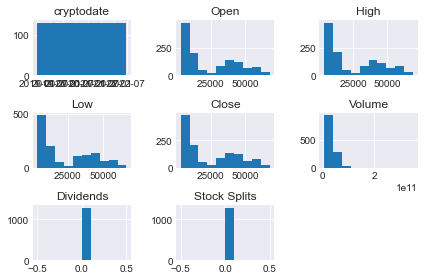


-----Missing Values-----

cryptodate       0
Open             0
High             0
Low              0
Close            0
Volume           0
Dividends        0
Stock Splits     0
crypto_ticker    0
dtype: int64


In [17]:
##Data Understanding
print("\n-----Data Profile-----\n")
print(bitcoin_data.shape)
print(bitcoin_data.dtypes)
print("\n-----Statistical Analysis-----\n")
print(BTC_crypto_data.describe())

BTC_crypto_data.hist()
plt.tight_layout()
plt.show()



#Data Preprocessing
print("\n-----Missing Values-----\n")
print(df.isna().sum())

In [19]:
##### MOVING AVERAGES FOR CLOSING PRICE ##### 


#Calculate the moving average
bitcoin_data['7_MA_Close'] = bitcoin_data['Close'].rolling(window=7).mean()
bitcoin_data['30_MA_Close'] = bitcoin_data['Close'].rolling(window=30).mean()
bitcoin_data['90_MA_Close'] = bitcoin_data['Close'].rolling(window=90).mean()
bitcoin_data['180_MA_Close'] = bitcoin_data['Close'].rolling(window=180).mean()
bitcoin_data['365_MA_Close'] = bitcoin_data['Close'].rolling(window=365).mean()

#Calculate the moving standard deviation
bitcoin_data['7_STD_Close'] = bitcoin_data['Close'].rolling(window=7).std()
bitcoin_data['30_STD_Close'] = bitcoin_data['Close'].rolling(window=30).std()
bitcoin_data['90_STD_Close'] = bitcoin_data['Close'].rolling(window=90).std()
bitcoin_data['180_STD_Close'] = bitcoin_data['Close'].rolling(window=180).std()
bitcoin_data['365_STD_Close'] = bitcoin_data['Close'].rolling(window=365).std()


##### MOVING AVERAGES FOR CALCULATED FIELDS: DAILY RETURNS

#Calculate the 30 day moving average
bitcoin_data['7_MA_daily_return($)'] = bitcoin_data['daily_return($)'].rolling(window=7).mean()
bitcoin_data['30_MA_daily_return($)'] = bitcoin_data['daily_return($)'].rolling(window=30).mean()
bitcoin_data['90_MA_daily_return($)'] = bitcoin_data['daily_return($)'].rolling(window=90).mean()
bitcoin_data['180_MA_daily_return($)'] = bitcoin_data['daily_return($)'].rolling(window=180).mean()
bitcoin_data['365_MA_daily_return($)'] = bitcoin_data['daily_return($)'].rolling(window=365).mean()

#Calculate the moving standard deviation
bitcoin_data['7_STD_daily_return($)'] = bitcoin_data['daily_return($)'].rolling(window=7).std()
bitcoin_data['30_STD_daily_return($)'] = bitcoin_data['daily_return($)'].rolling(window=30).std()
bitcoin_data['90_STD_daily_return($)'] = bitcoin_data['daily_return($)'].rolling(window=90).std()
bitcoin_data['180_STD_daily_return($)'] = bitcoin_data['daily_return($)'].rolling(window=180).std()
bitcoin_data['365_STD_daily_return($)'] = bitcoin_data['daily_return($)'].rolling(window=365).std()



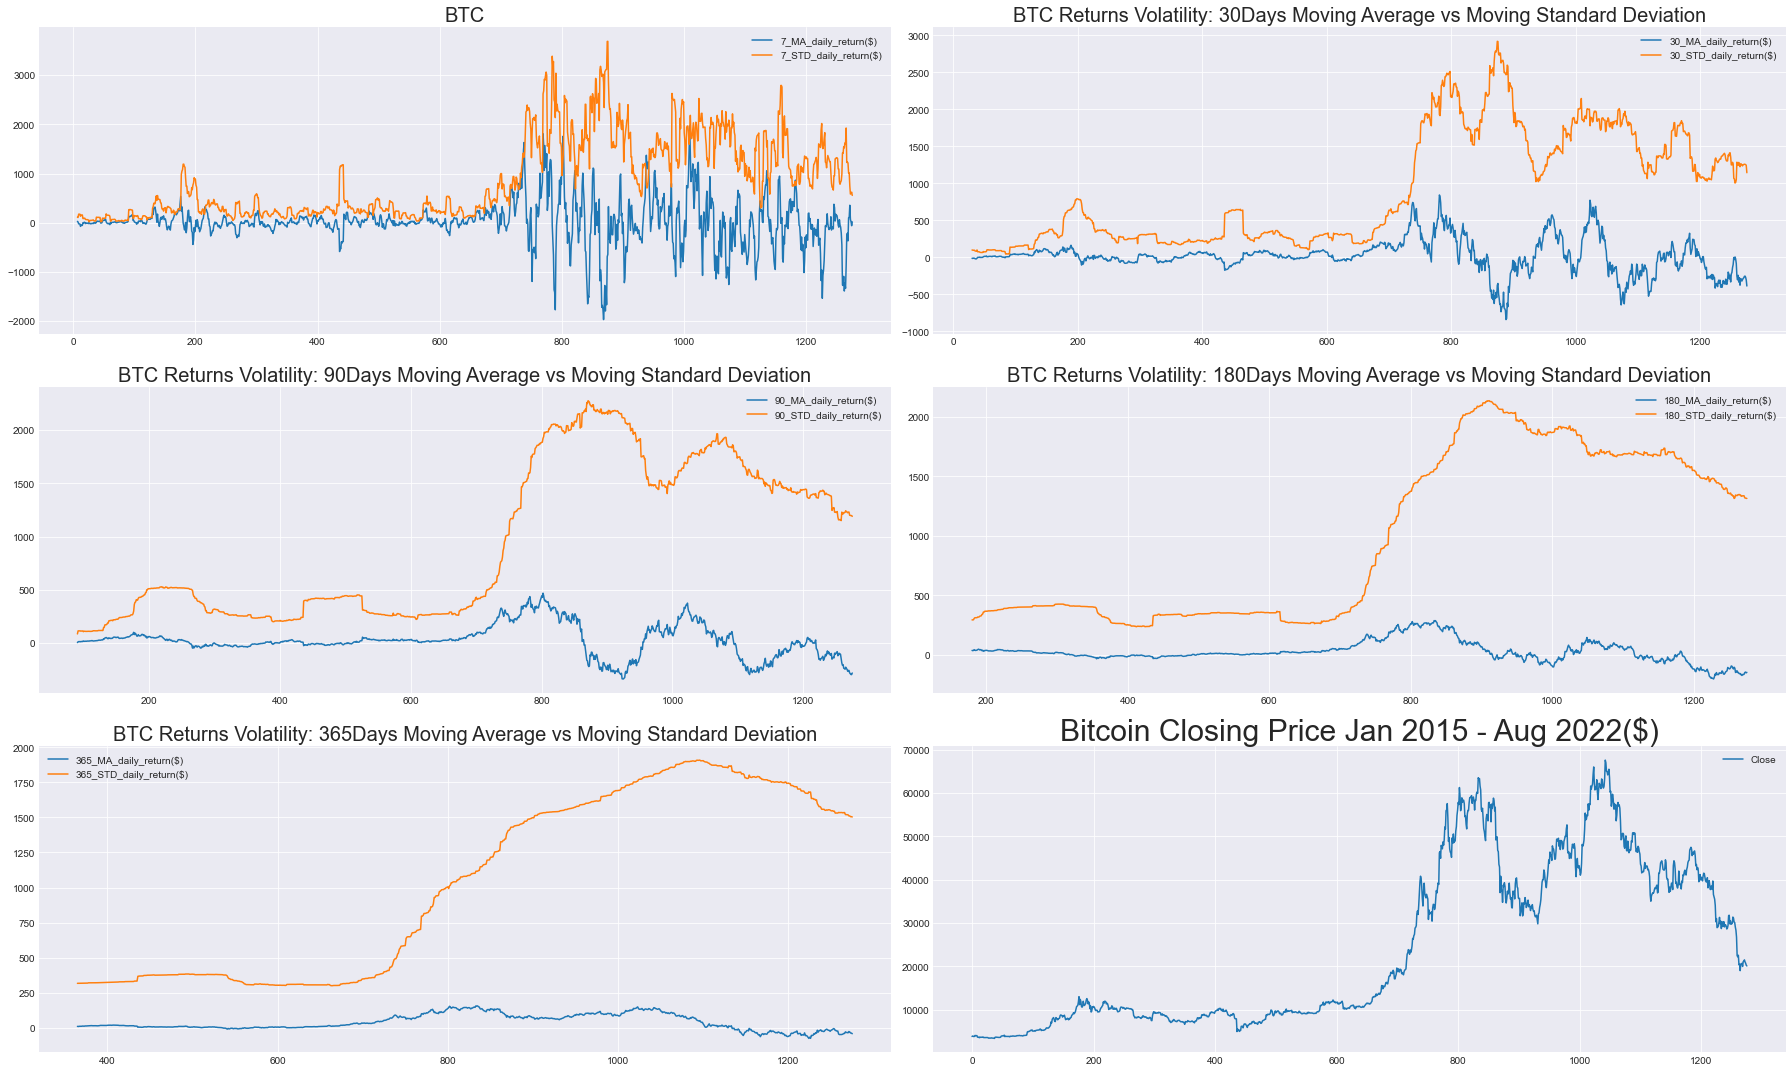

In [20]:
fig, axes = plt.subplots(nrows=3, ncols=2)

bitcoin_data[['7_MA_daily_return($)','7_STD_daily_return($)']].plot(ax=axes[0,0],figsize=(25,15))
bitcoin_data[['30_MA_daily_return($)','30_STD_daily_return($)']].plot(ax=axes[0,1],figsize=(25,15))
bitcoin_data[['90_MA_daily_return($)','90_STD_daily_return($)']].plot(ax=axes[1,0],figsize=(25,15))
bitcoin_data[['180_MA_daily_return($)','180_STD_daily_return($)']].plot(ax=axes[1,1],figsize=(25,15))
bitcoin_data[['365_MA_daily_return($)','365_STD_daily_return($)']].plot(ax=axes[2,0],figsize=(25,15))
bitcoin_data[['Close']].plot(ax=axes[2,1],figsize=(25,15))



axes[0,0].set_title('BTC', fontsize=20)
axes[0,1].set_title('BTC Returns Volatility: 30Days Moving Average vs Moving Standard Deviation', fontsize=20)
axes[1,0].set_title('BTC Returns Volatility: 90Days Moving Average vs Moving Standard Deviation', fontsize=20)
axes[1,1].set_title('BTC Returns Volatility: 180Days Moving Average vs Moving Standard Deviation', fontsize=20)
axes[2,0].set_title('BTC Returns Volatility: 365Days Moving Average vs Moving Standard Deviation',fontsize=20)
axes[2,1].set_title('Bitcoin Closing Price Jan 2015 - Aug 2022($)',fontsize=30)

plt.tight_layout()




In [22]:
# Obtain data for feature
# close_price = bitcoin_data.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits', 'crypto_ticker', 'cryptodate'])

close_price = bitcoin_data.filter(['Close'])

# Split data into training and test data 80% for training data and 20% for test data
prediction_period = 255 # In days

training_data = close_price[:len(close_price)-prediction_period].values.reshape(-1,1)
testing_data = close_price[len(close_price)-prediction_period:].values.reshape(-1,1)

# Scale the data
scaler_train = MinMaxScaler(feature_range=(0,1))
scaled_train = scaler_train.fit_transform(training_data)


scaler_test = MinMaxScaler(feature_range=(0,1))
scaled_test = scaler_test.fit_transform(testing_data)
scaled_test 

array([[0.88587347],
       [0.93192809],
       [0.96757943],
       [0.88966537],
       [0.85840004],
       [0.87284625],
       [0.86331404],
       [0.90675428],
       [0.85163427],
       [0.81288169],
       [0.85695555],
       [0.89003187],
       [0.88304652],
       [0.87130843],
       [0.86482941],
       [0.91059735],
       [0.90531703],
       [0.87405355],
       [0.86732728],
       [0.87560352],
       [0.91266919],
       [1.        ],
       [0.98774439],
       [0.94703109],
       [0.94609864],
       [0.92974369],
       [0.93620283],
       [0.95674514],
       [0.91742483],
       [0.84746228],
       [0.85172117],
       [0.78115614],
       [0.80540868],
       [0.83790392],
       [0.81799177],
       [0.767709  ],
       [0.79406959],
       [0.76752643],
       [0.78800574],
       [0.71169316],
       [0.73734369],
       [0.78746562],
       [0.79896137],
       [0.78245974],
       [0.78708191],
       [0.77159222],
       [0.71227979],
       [0.621

In [23]:
#### Feature Engineering


#Create a series of timesteps and observations for X and Y axis for test and training data

def split_x_and_yaxis(dataset, look_back=3):

    dataX, dataY = [], []

    for i in range(len(dataset) - look_back):
        window_size_x = dataset[i:(i + look_back), 0]
        
        dataX.append(window_size_x)
        dataY.append(dataset[i + look_back, 0]) # this is the label or actual y-value
    return np.array(dataX), np.array(dataY)

trainX, trainY = split_x_and_yaxis(scaled_train)
testX, testY = split_x_and_yaxis(scaled_test)



## View shape of the datasets
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

## Reshape data to 3D Tensors for LSTM for (Samples, timesteps, features) Batch size, timesteps or lookback, target features

trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1 ))

print("Shape of trainX: ", trainX.shape)
print("Shape of testX: ", testX.shape)


(1018, 3)
(1018,)
(252, 3)
(252,)
Shape of trainX:  (1018, 3, 1)
Shape of testX:  (252, 3, 1)


In [ ]:
#### LSTM Prediction Engine

##Create the LSTM Model

regressor = Sequential()
# First Layer
regressor.add(LSTM(units = 128, activation = 'relu',return_sequences=True, input_shape = (trainX.shape[1], trainX.shape[2])))
regressor.add(Dropout(0.2))

# Second Layer
regressor.add(LSTM(units = 64, activation = 'relu',return_sequences=True, input_shape = (trainX.shape[1], trainX.shape[2])))
regressor.add(Dropout(0.2))

# Third Layer
regressor.add(LSTM(units = 64, activation = 'relu',return_sequences=True, input_shape = (trainX.shape[1], trainX.shape[2])))
regressor.add(Dropout(0.2))

# Fourth Layer
regressor.add(LSTM(units = 64, input_shape = (trainX.shape[1], trainX.shape[2])))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))
regressor.summary()


In [ ]:
## Compile the LSTM model

from  keras.callbacks import ModelCheckpoint, EarlyStopping

# Compiling the LSTM
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

checkpoint_path = 'new_crypto_model.hdf5'

checkpoint = ModelCheckpoint(filepath=checkpoint_path,
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='min')


earlystopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

callbacks = [checkpoint, earlystopping]


history = regressor.fit(trainX, trainY, batch_size = 32, epochs = 150, verbose=1, shuffle=False, validation_data=(testX, testY), callbacks=callbacks)

In [ ]:
## Save LSTM Model
#
from  keras.models import load_model

model_from_saved_checkpoint = load_model(checkpoint_path)

In [1]:
## Visualise Loss

plt.figure(figsize=(16,7))
plt.plot(history.history['loss'], label='train')

plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

NameError: name 'plt' is not defined

In [ ]:
# Transformation to original form and making the predictions

predicted_btc_price_test_data = regressor.predict(testX)
# test_predicted = model_from_saved_checkpoint.predict(testing_data_X)

predicted_btc_price_test_data = scaler_test.inverse_transform(predicted_btc_price_test_data.reshape(-1, 1))
test_actual = scaler_test.inverse_transform(testY.reshape(-1, 1))

In [25]:
def rmse(actual, predict):
    
    predict = np.array(predict)
    actual = np.array(actual)
    mse = mean_squared_error(actual, predict)
    rmse = math.sqrt(mse)
    return rmse

rmse(test_actual, predicted_btc_price_test_data )

NameError: name 'test_actual' is not defined

In [ ]:
plt.figure(figsize=(16,7))

plt.plot(predicted_btc_price_test_data, 'r', marker='.', label='Predicted Test')

plt.plot(test_actual, marker='.', label='Actual Test')

plt.legend()
plt.show()

In [ ]:
## Future 5 days

testX.shape
look_back = 5
past_days = testX[testX.shape[0] - look_back :]

past_days.shape
past_days

future_days = []
for i in range(5):
    forecast_test_x = model_from_saved_checkpoint.predict(past_days[i:i+1])
    forecast_test_x = scaler_test.inverse_transform(forecast_test_x.reshape(-1,1))
    future_days.append(forecast_test_x)

print ("Forecast:", np.array(future_days))



In [61]:
#### LSTM Prediction Engine

##Create the LSTM Model

regressor = Sequential()
# First Layer
regressor.add(LSTM(units = 128, activation = 'relu',return_sequences=True, input_shape = (trainX.shape[1], trainX.shape[2])))
regressor.add(Dropout(0.2))

# Second Layer
regressor.add(LSTM(units = 64, activation = 'relu',return_sequences=True, input_shape = (trainX.shape[1], trainX.shape[2])))
regressor.add(Dropout(0.2))

# Third Layer
regressor.add(LSTM(units = 64, activation = 'relu',return_sequences=True, input_shape = (trainX.shape[1], trainX.shape[2])))
regressor.add(Dropout(0.2))

# Fourth Layer
regressor.add(LSTM(units = 64, input_shape = (trainX.shape[1], trainX.shape[2])))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))
regressor.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 128)            66560     
                                                                 
 dropout (Dropout)           (None, 3, 128)            0         
                                                                 
 lstm_1 (LSTM)               (None, 3, 64)             49408     
                                                                 
 dropout_1 (Dropout)         (None, 3, 64)             0         
                                                                 
 lstm_2 (LSTM)               (None, 3, 64)             33024     
                                                                 
 dropout_2 (Dropout)         (None, 3, 64)             0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                3

In [62]:
## Compile the LSTM model

from  keras.callbacks import ModelCheckpoint, EarlyStopping

# Compiling the LSTM
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

checkpoint_path = 'new_crypto_model.hdf5'

checkpoint = ModelCheckpoint(filepath=checkpoint_path,
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='min')


earlystopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

callbacks = [checkpoint, earlystopping]


history = regressor.fit(trainX, trainY, batch_size = 32, epochs = 150, verbose=1, shuffle=False, validation_data=(testX, testY), callbacks=callbacks)

Epoch 1/150
29/32 [==========================>...] - ETA: 0s - loss: 0.0649  
Epoch 1: val_loss improved from inf to 0.06634, saving model to new_crypto_model.hdf5
32/32 [==============================] - 6s 38ms/step - loss: 0.0764 - val_loss: 0.0663
Epoch 2/150
30/32 [===========================>..] - ETA: 0s - loss: 0.1060
Epoch 2: val_loss did not improve from 0.06634
32/32 [==============================] - 0s 11ms/step - loss: 0.1159 - val_loss: 0.1021
Epoch 3/150
30/32 [===========================>..] - ETA: 0s - loss: 0.0695
Epoch 3: val_loss improved from 0.06634 to 0.03602, saving model to new_crypto_model.hdf5
32/32 [==============================] - 0s 13ms/step - loss: 0.0743 - val_loss: 0.0360
Epoch 4/150
30/32 [===========================>..] - ETA: 0s - loss: 0.0359
Epoch 4: val_loss improved from 0.03602 to 0.01590, saving model to new_crypto_model.hdf5
32/32 [==============================] - 0s 13ms/step - loss: 0.0391 - val_loss: 0.0159
Epoch 5/150
32/32 [==========

Epoch 38/150
31/32 [============================>.] - ETA: 0s - loss: 0.0025   
Epoch 38: val_loss improved from 0.00218 to 0.00213, saving model to new_crypto_model.hdf5
32/32 [==============================] - 0s 12ms/step - loss: 0.0027 - val_loss: 0.0021
Epoch 39/150
31/32 [============================>.] - ETA: 0s - loss: 0.0025   
Epoch 39: val_loss did not improve from 0.00213
32/32 [==============================] - 0s 11ms/step - loss: 0.0025 - val_loss: 0.0027
Epoch 40/150
31/32 [============================>.] - ETA: 0s - loss: 0.0022   
Epoch 40: val_loss improved from 0.00213 to 0.00199, saving model to new_crypto_model.hdf5
32/32 [==============================] - 0s 12ms/step - loss: 0.0024 - val_loss: 0.0020
Epoch 41/150
31/32 [============================>.] - ETA: 0s - loss: 0.0024   
Epoch 41: val_loss did not improve from 0.00199
32/32 [==============================] - 0s 11ms/step - loss: 0.0026 - val_loss: 0.0021
Epoch 42/150
31/32 [============================>.

In [63]:
## Save LSTM Model
#
from  keras.models import load_model

model_from_saved_checkpoint = load_model(checkpoint_path)

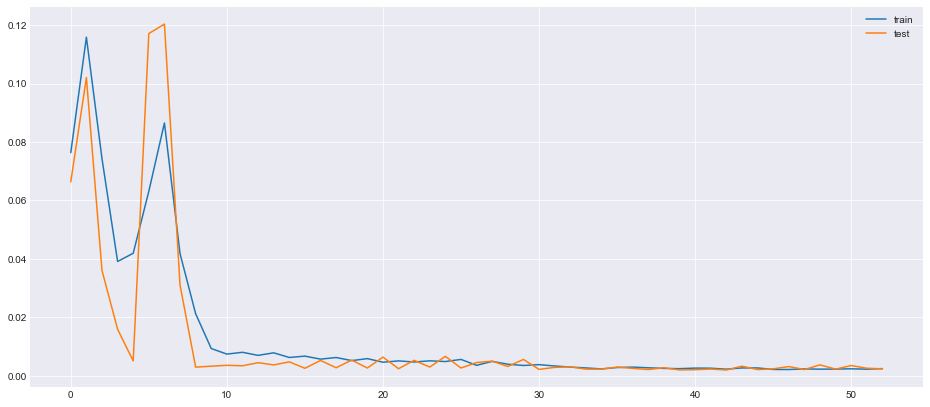

In [64]:
## Visualise Loss

plt.figure(figsize=(16,7))
plt.plot(history.history['loss'], label='train')

plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [65]:
# Transformation to original form and making the predictions

predicted_btc_price_test_data = regressor.predict(testX)
# test_predicted = model_from_saved_checkpoint.predict(testing_data_X)

predicted_btc_price_test_data = scaler_test.inverse_transform(predicted_btc_price_test_data.reshape(-1, 1))
test_actual = scaler_test.inverse_transform(testY.reshape(-1, 1))

8/8 [==============================] - 1s 4ms/step


In [83]:
def rmse(actual, predict):
    
    predict = np.array(predict)
    actual = np.array(actual)
    mse = mean_squared_error(actual, predict)
    rmse = math.sqrt(mse)
    return rmse

rmse(test_actual, predicted_btc_price_test_data )

2151.8864299727534

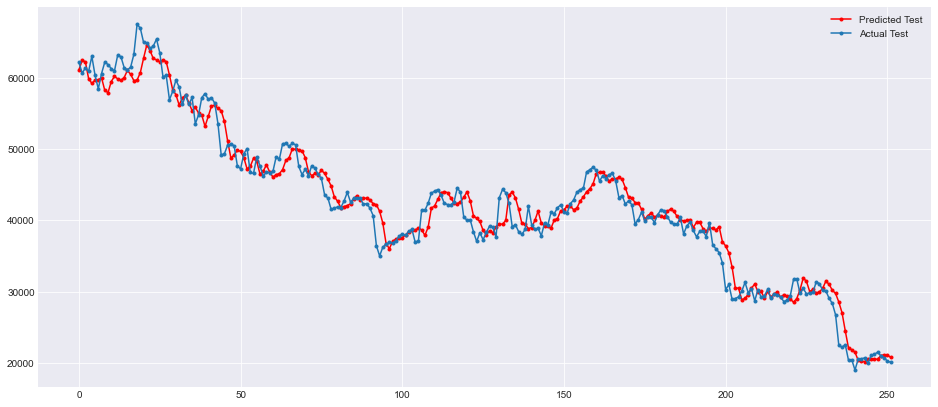

In [67]:
plt.figure(figsize=(16,7))

plt.plot(predicted_btc_price_test_data, 'r', marker='.', label='Predicted Test')

plt.plot(test_actual, marker='.', label='Actual Test')

plt.legend()
plt.show()

In [84]:
## Future 5 days

testX.shape
look_back = 5
past_days = testX[testX.shape[0] - look_back :]

past_days.shape
past_days

future_days = []
for i in range(5):
    forecast_test_x = model_from_saved_checkpoint.predict(past_days[i:i+1])
    forecast_test_x = scaler_test.inverse_transform(forecast_test_x.reshape(-1,1))
    future_days.append(forecast_test_x)

print ("Forecast:", np.array(future_days))



1/1 [==============================] - 0s 17ms/step
Forecast: [[[20536.395]]

 [[21043.666]]

 [[21146.39 ]]

 [[21132.93 ]]

 [[20799.85 ]]]
